In [227]:
import matplotlib.pyplot as plt
import numpy as np

In [228]:
MAX_INIT_TIME = 20
MAX_DURATION = 10

In [229]:
# Class for Task
class Task():
    def __init__(self, num):
        self.initTime = np.random.randint(0, MAX_INIT_TIME)
        self.duration = np.random.randint(0, MAX_DURATION)
        self.endTime = self.initTime + self.duration
        self.num = num
        
        print(self.num+1, self.initTime, self.duration, self.endTime)

In [230]:
# Number of tasks for example
numTasks = 10
# Empty array of tasks
tasks = []

for i in range(numTasks):
    tasks.append(Task(i))

1 5 5 10
2 15 9 24
3 17 9 26
4 6 0 6
5 14 7 21
6 9 8 17
7 9 9 18
8 7 7 14
9 1 7 8
10 7 6 13


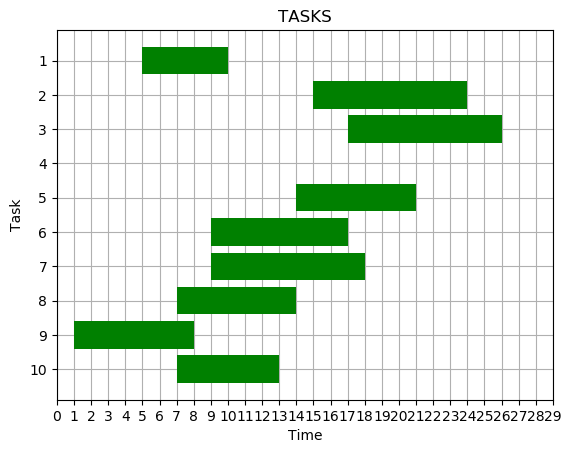

In [231]:
def plotGraph(tasks_arr):
    fig, ax = plt.subplots()

    n_task = []
    duration = []
    initTimes = []
    for task in tasks_arr:
        n_task.append(str(task.num + 1))
        duration.append(task.duration)
        initTimes.append(task.initTime)

    ax.barh(n_task, duration, left=initTimes, color='green', zorder=3)
    ax.grid(which='both', zorder=0)
    ax.set_yticks(n_task)
    ax.set_yticklabels(n_task)
    ax.set_xticks(np.arange(0, MAX_INIT_TIME + MAX_DURATION))
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_ylabel('Task')
    ax.set_xlabel('Time')
    ax.set_title('TASKS')

    plt.show()

plotGraph(tasks)

# Greedy Algorithm 

## By initial task time



In [232]:
# To heapify subtree rooted at index i. 
# n is size of heap 
def heapify(arr, n, i): 
    largest = i  # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i].initTime < arr[l].initTime: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest].initTime < arr[r].initTime: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        # swap
        temp = arr[i]
        arr[i] = arr[largest]
        arr[largest] = temp
  
        # Heapify the root. 
        heapify(arr, n, largest) 
  
# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        temp = arr[0]
        arr[0] = arr[i]
        arr[i] = temp
        heapify(arr, i, 0) 
  
# Driver code to test above 
heapSort(tasks) 
n = len(tasks) 
print ("Sorted array is") 
for i in range(n): 
    print ("%d" %(tasks[i].num+1)," - ","%d" %tasks[i].initTime)

Sorted array is
9  -  1
1  -  5
4  -  6
10  -  7
8  -  7
7  -  9
6  -  9
5  -  14
2  -  15
3  -  17


In [233]:
def greedByInitTime(tasks):
    taskList = []
    taskList.append(tasks[0])
    lastTask = taskList[0]
    for i in range(1, len(tasks), 1):
        if tasks[i].initTime >= lastTask.endTime:
            taskList.append(tasks[i])
            lastTask = tasks[i]
    
    print("The number of tasks compatible by init time:")
    print(len(taskList))
    plotGraph(taskList)

The number of tasks compatible by init time:
2


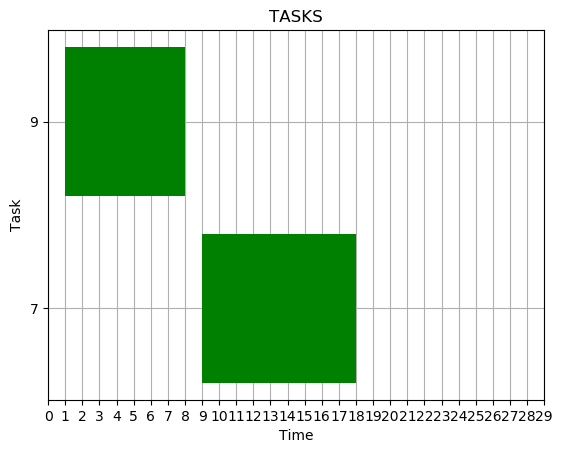

In [234]:
greedByInitTime(tasks)

## By Finish Time

In [235]:
# To heapify subtree rooted at index i. 
# n is size of heap 
def heapify(arr, n, i): 
    largest = i  # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i].endTime < arr[l].endTime: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest].endTime < arr[r].endTime: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        # swap
        temp = arr[i]
        arr[i] = arr[largest]
        arr[largest] = temp
  
        # Heapify the root. 
        heapify(arr, n, largest) 
  
# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        temp = arr[0]
        arr[0] = arr[i]
        arr[i] = temp
        heapify(arr, i, 0) 
  
# Driver code to test above 
heapSort(tasks) 
n = len(tasks) 
print ("Sorted array is") 
for i in range(n): 
    print ("%d" %(tasks[i].num+1)," - ", "%d" %tasks[i].endTime)

Sorted array is
4  -  6
9  -  8
1  -  10
10  -  13
8  -  14
6  -  17
7  -  18
5  -  21
2  -  24
3  -  26


In [240]:
def greedByEndTime(tasks):
    taskList = []
    taskList.append(tasks[0])
    lastTask = taskList[0]
    for i in range(1, len(tasks), 1):
        if tasks[i].initTime >= lastTask.endTime:
            taskList.append(tasks[i])
            lastTask = tasks[i]
    
    print("The number of tasks compatible by end time:")
    print(len(taskList))
    for i in range(len(taskList)):
        print("%d" %(i+1), " - ", "%d" %(taskList[i].num+1))
    plotGraph(taskList)

The number of tasks compatible by end time:
3
1  -  4
2  -  10
3  -  5


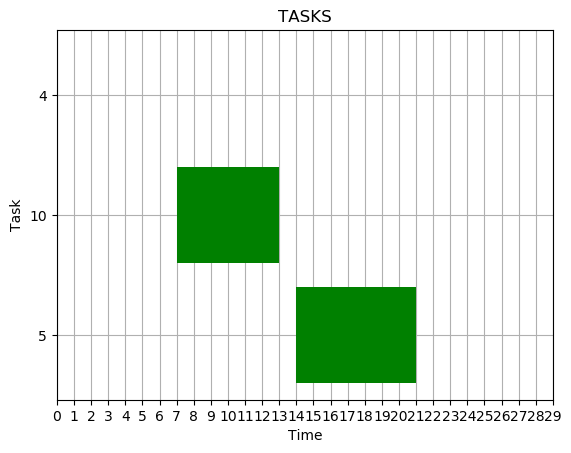

In [241]:
greedByEndTime(tasks)

## By Duration

In [242]:
# To heapify subtree rooted at index i. 
# n is size of heap 
def heapify(arr, n, i): 
    largest = i  # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i].duration < arr[l].duration: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest].duration < arr[r].duration: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        # swap
        temp = arr[i]
        arr[i] = arr[largest]
        arr[largest] = temp
  
        # Heapify the root. 
        heapify(arr, n, largest) 
  
# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        temp = arr[0]
        arr[0] = arr[i]
        arr[i] = temp
        heapify(arr, i, 0) 
  
# Driver code to test above 
heapSort(tasks) 
n = len(tasks) 
print ("Sorted array is") 
for i in range(n): 
    print ("%d" %(tasks[i].num+1)," - ", "%d" %tasks[i].duration)

Sorted array is
4  -  0
1  -  5
10  -  6
8  -  7
5  -  7
9  -  7
6  -  8
7  -  9
3  -  9
2  -  9


In [243]:
def greedByDuration(tasks):
    taskList = []
    taskList.append(tasks[0])
    lastTask = taskList[0]
    for i in range(1, len(tasks), 1):
        if tasks[i].initTime >= lastTask.endTime:
            taskList.append(tasks[i])
            lastTask = tasks[i]
    
    print("The number of tasks compatible by duration:")
    print(len(taskList))
    plotGraph(taskList)

The number of tasks compatible by duration:
3


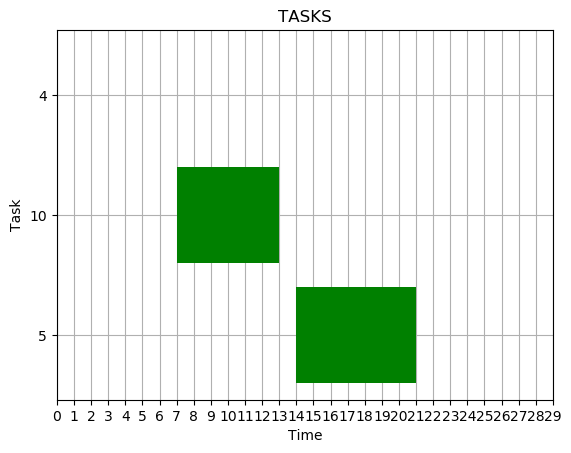

In [244]:
greedByDuration(tasks)